In [1]:
#Using linear model

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("ToyotaCorolla.csv", encoding='latin1') 
df.shape

(1436, 38)

In [4]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
df.corr() 

C:\Users\Dell\AppData\Local\Temp\ipykernel_6444\3514509782.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [6]:
Req_col = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
df[Req_col].corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [8]:
y = df["Price"]
x = df[["Age_08_04"]] 

In [9]:
# fitting the model..
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

# finding the mean square and rsquare values 
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
#print("mean squared error:",mse.round(2))
RMSE = np.sqrt(mse)
print("Root mean squared error:",RMSE.round(2))
r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

Root mean squared error: 1744.82
r square: 0.77


In [10]:
x = df[["Age_08_04" , "Gears"]]
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
#print("mean squared error:",mse.round(2))
RMSE = np.sqrt(mse)
# B0 + B1R&D Spend + B2Marketing Spend
print("Root mean squared error:",RMSE.round(2))
r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

Root mean squared error: 1731.93
r square: 0.77


In [11]:
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
#print("mean squared error:",mse.round(2))
RMSE = np.sqrt(mse)
print("Root mean squared error:",RMSE.round(2))
r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

Root mean squared error: 1731.93
r square: 0.77


In [12]:
x = df[["Age_08_04" , "Gears" , "Weight" , "KM"]]
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
#print("mean squared error:",mse.round(2))
RMSE = np.sqrt(mse)
print("Root mean squared error:",RMSE.round(2))
r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

Root mean squared error: 1397.49
r square: 0.85


In [13]:
x = df[["Age_08_04" , "Gears" , "Weight" , "KM" , "HP"]]
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
#print("mean squared error:",mse.round(2))
RMSE = np.sqrt(mse)
print("Root mean squared error:",RMSE.round(2))
r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

Root mean squared error: 1342.99
r square: 0.86


In [14]:
x = df[["Age_08_04" , "Gears" , "Weight" , "KM" , "HP" , "Quarterly_Tax"]]
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
#print("mean squared error:",mse.round(2))
RMSE = np.sqrt(mse)
print("Root mean squared error:",RMSE.round(2))
r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

Root mean squared error: 1339.11
r square: 0.86


In [15]:
x = df[["Age_08_04" , "Gears" , "Weight" , "KM" , "HP" , "Quarterly_Tax" , "Doors"]]
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
#print("mean squared error:",mse.round(2))
RMSE = np.sqrt(mse)
print("Root mean squared error:",RMSE.round(2))
r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

Root mean squared error: 1339.11
r square: 0.86


In [17]:
x = df[["Age_08_04" , "Gears" , "Weight" , "KM" , "HP" , "Quarterly_Tax" , "cc"]]
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x,y)
y_pred = LR.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
#print("mean squared error:",mse.round(2))
RMSE = np.sqrt(mse)
print("Root mean squared error:",RMSE.round(2))
r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

Root mean squared error: 1338.26
r square: 0.86


In [18]:
#STATS MODEL
# we imported data set in above model so we directly imported stats model here..
import statsmodels.formula.api as smf
model = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:48:16   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
print("Mean square error:",np.mean(model.resid ** 2))

Mean square error: 1790935.608390293


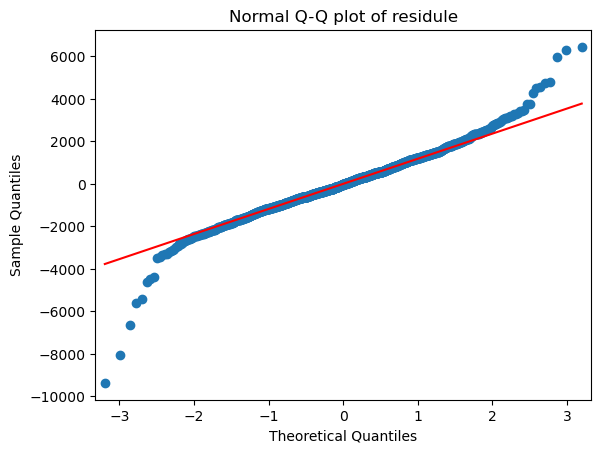

In [20]:
#Resednitail analysis
#Test for normality 

import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title('Normal Q-Q plot of residule')
plt.show()

<Axes: >

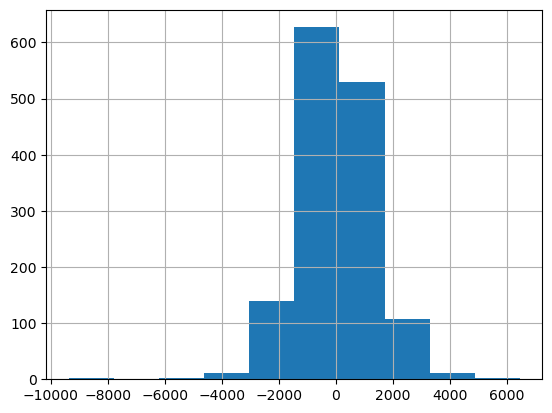

In [21]:
model.resid.hist() #histogram..

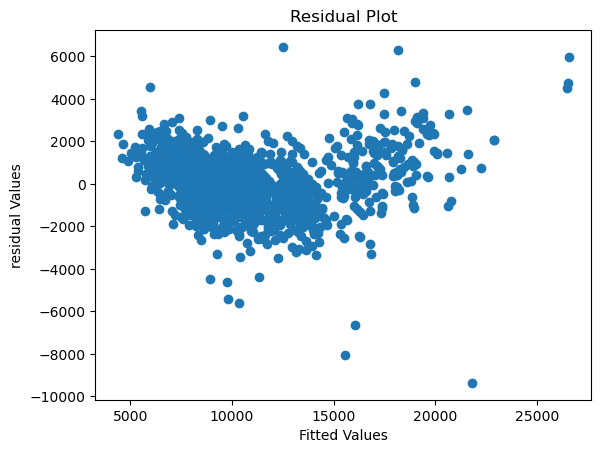

In [22]:
# Residual plot
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues,model.resid)
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("residual Values")
plt.show()

In [23]:
# checking the model influence 
model_influence = model.get_influence()
model_influence
(cooks,pvalue) = model_influence.cooks_distance
cooks = pd.DataFrame(cooks)
cooks[0].describe()

count    1.436000e+03
mean     5.756075e-02
std      2.098641e+00
min      7.279480e-12
25%      3.272575e-05
50%      1.409548e-04
75%      4.535454e-04
max      7.952011e+01
Name: 0, dtype: float64

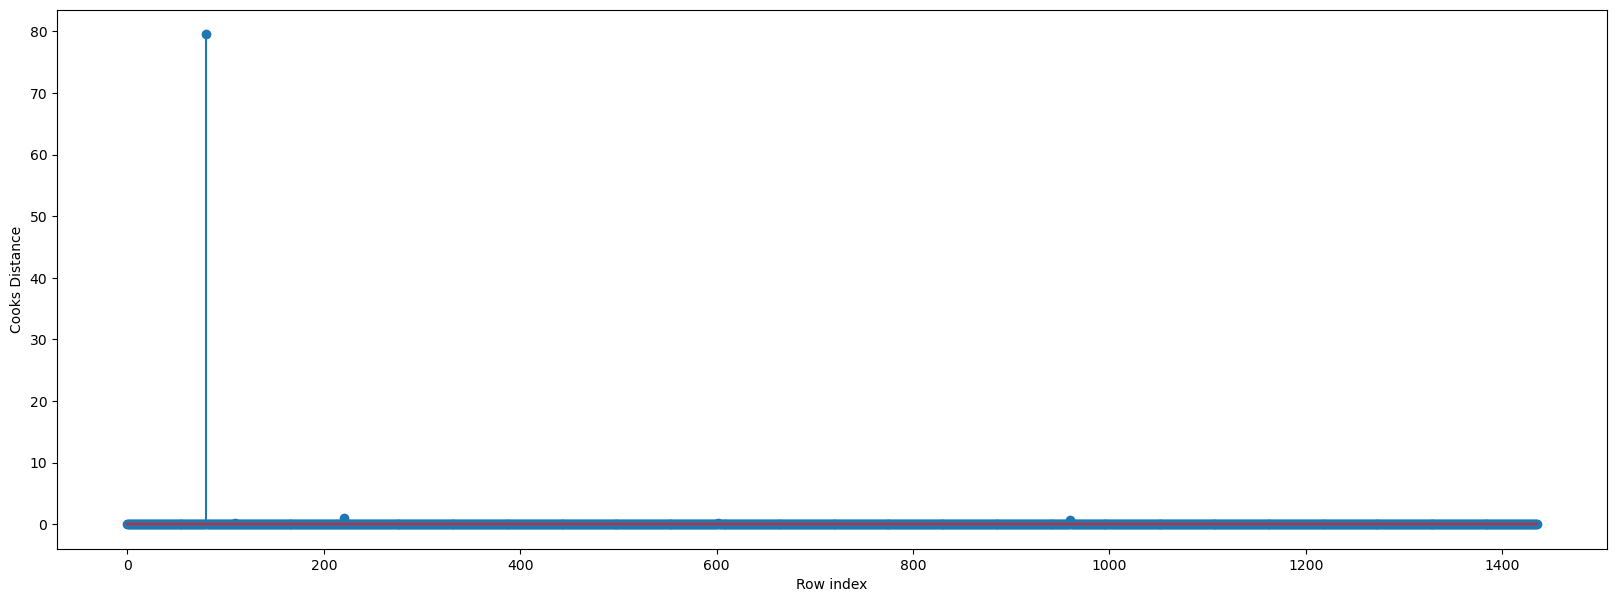

In [24]:
# PLot the influence values..

fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(df)),np.round(cooks[0],3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show()

In [25]:
cooks[0][cooks[0]>0.5]
#checking which values are influencing..

80     79.520106
221     1.021031
960     0.605000
Name: 0, dtype: float64